In [1]:
import pandas as pd

data=pd.read_csv("iris.csv")


In [2]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X=data[["sepal_length","sepal_width","petal_length","petal_width"]]

In [4]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
data['class'] = data['class'].replace({'Iris-setosa': 0, 'Iris-virginica': 1,'Iris-versicolor':2})

In [6]:
print(data['class'].value_counts())


0    50
2    50
1    50
Name: class, dtype: int64


In [7]:
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [8]:
Y=data["class"]

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
Y


In [ ]:
Y = tf.convert_to_tensor(Y, dtype=tf.float32)

In [ ]:
X = tf.convert_to_tensor(X, dtype=tf.float32)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33)

In [10]:
N,D=X_train.shape

In [11]:
D

4

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(D,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [14]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["mae"])

In [15]:
r=model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=50)

Epoch 1/50
4/4 [==============================] - 1s 86ms/step - loss: 0.8567 - mae: 0.8156 - val_loss: 1.0726 - val_mae: 0.9175
Epoch 2/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8225 - mae: 0.7908 - val_loss: 1.0433 - val_mae: 0.8976
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.7931 - mae: 0.7676 - val_loss: 1.0149 - val_mae: 0.8781
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.7649 - mae: 0.7450 - val_loss: 0.9839 - val_mae: 0.8568
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.7354 - mae: 0.7211 - val_loss: 0.9514 - val_mae: 0.8340
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.7041 - mae: 0.6947 - val_loss: 0.9155 - val_mae: 0.8077
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6704 - mae: 0.6650 - val_loss: 0.8758 - val_mae: 0.7774
Epoch 8/50
4/4 [==============================] - 0s 13ms/step - loss: 0.6340 - mae: 0.6320 - val

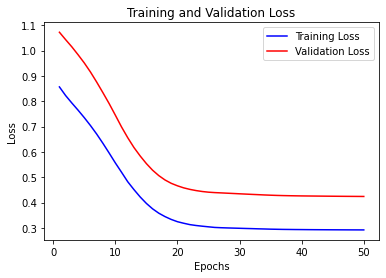

In [17]:
import matplotlib.pyplot as plt
train_loss = r.history['loss']
val_loss = r.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

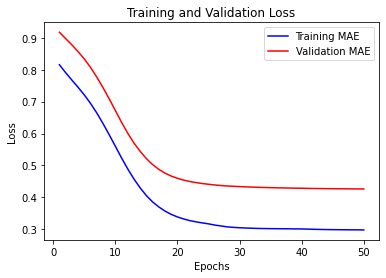

In [19]:
train_loss = r.history['mae']
val_loss = r.history['val_mae']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()